In [1]:
# Obtén K clusters del conjunto Iris mediante el método de K-medias.
# a) Cómo has escogido el inicio de los centroides?
# b) ¿Cómo has escogido el número de clusters óptimos?

In [5]:
# Empezamos cargando el conjunto de datos Iris
from sklearn.datasets import load_iris

data = load_iris()

# Valores de las variables predictoras
X = data.data

# Nombres de las variables predictoras
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X.shape

(150, 4)

In [9]:
# Hay cuatro variables predictoras y 150 observaciones

# Variable respuesta
y = data.target

C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

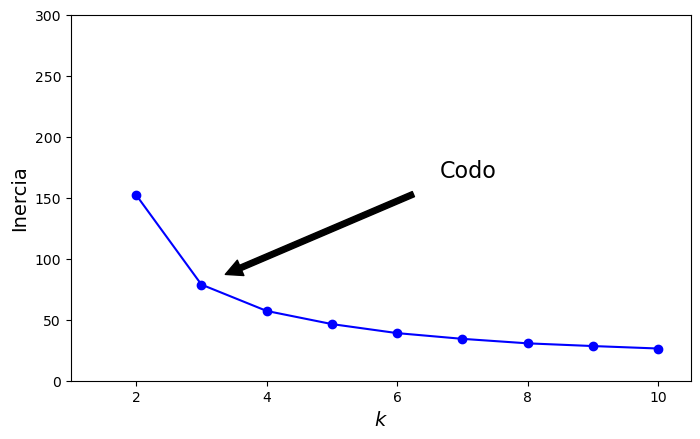

In [22]:
# Para escoger el número de clusters se grafica la inercia frente al número K de clusters (desde K=2 hasta K=10).
# Para cada valor de K, se escogerá la mejor solución obtenida a partir de diferentes condiciones iniciales para evitar caer en mínimos
# locales. Para indicar que se toman varias condiciones iniciales se pasa el argumento n_init=10 en la creación de los objetos KMeans.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmedias_k = [KMeans(n_clusters=k, random_state=3, n_init=10).fit(X) for k in range(2,11)]
inercias = [model.inertia_ for model in kmedias_k]
plt.figure(figsize=(8, 4.75))
plt.plot(range(2,11), inercias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
# Indicación del codo
plt.annotate('Codo', xy=(3, inercias[1]), xytext=(0.55, 0.55), textcoords='figure fraction', fontsize=16, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 10.5, 0, 300])
plt.show()

In [24]:
# Se observa que el codo se da para K=3, por lo que serán tres el número de clusters

# Creación de tres clusters con el conjunto de datos X
kmedias_3 = KMeans(n_clusters=3, random_state=3, n_init=10).fit(X)

# Predicciones del modelo
y_pred = kmedias_3.fit_predict(X)
y_pred

C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [26]:
# Comparamos los resultados del modelo con los reales
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Se observa que todas las flores de clase 0 se clasifican correctamente, mientras que para algunas flores de clase 1 y 2 existen
# discrepancias.